# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace

In [ ]:
df = pd.read_csv('/content/airbnb_hw.csv')

In [ ]:
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables; `object` is a bad sign
print(df.columns, '\n') # Column names

(30478, 13) 

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object') 



After coercion: 
 count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64 

Total Missings: 
 181 



<Axes: >

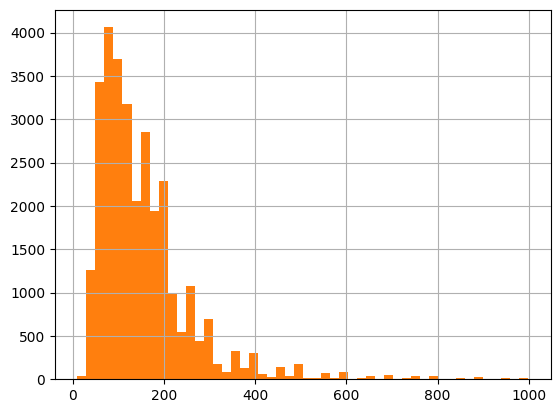

In [ ]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') # Coerce the variable to numeric

# Create a missing dummy:
df['Price_nan'] = df['Price'].isnull() # Equals 1 if missing, 0 if non-null

# After coercion:
print('After coercion: \n', df['Price'].describe(),'\n') # Describe the numeric variable
df['Price'].hist(bins = 50) # Histogram of the variable values
print('Total Missings: \n', sum(df['Price_nan']),'\n') # How many missing values are there?

impute_value = df['Price'].median() # Or mean, or whatever

df['Price_impute'] = df['Price'].fillna(impute_value)
df['Price_impute'].hist(bins = 50)

To clean the price variable, I changed the data type from a string to a numeric. I also created a dummy variable for the missing values and got 181 prices that are missing. To handle these missing values, I filled the Price NA's with the median Price

In [ ]:
q1b_df = pd.read_csv('/content/mn_police_use_of_force.csv')

var = 'subject_injury' # A Categorical Example
print(q1b_df[var].unique(), '\n') # A Categorical Example
print(q1b_df[var].value_counts(), '\n')

q1b_df['si_nan'] = q1b_df[var].isnull() # Equals 1 if missing, 0 if non-null
print('Total Missings: \n', sum(q1b_df['si_nan']),'\n') # How many missing values are there?

print('Proportion of Missing Values: \n', sum(q1b_df['si_nan'])/q1b_df.shape[0],'\n')

pd.crosstab(q1b_df['subject_injury'], q1b_df['force_type']) # Notice the use of pd. and not df.



[nan 'No' 'Yes'] 

subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 

Total Missings: 
 9848 

Proportion of Missing Values: 
 0.7619342359767892 



force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal Projectile,Police K9 Bite,Taser
subject_injury,,,,,,,,,
No,0,1093,131,2,33,34,1,2,150
Yes,2,1286,41,0,44,40,2,44,172


There are about three quarters of the data thats is missing. Within the data that we do have we can see some trends appearing. Most categories of force have around an even amount of injuries and non injuries. It seems that chemical irritant's have the the highest proportion of non injuries and the K9 bites seem to have the highest proportion of injuries.

Question 1: Part 3

In [ ]:
dfc = pd.read_parquet('/content/justice_data.parquet')
dfc = dfc.rename(columns={'WhetherDefendantWasReleasedPretrial': 'released'})
var = 'released' # A Categorical Example
print(dfc[var].unique(), '\n') # A Categorical Example
print(dfc[var].value_counts(), '\n')
dfc[var] = dfc[var].replace( [9], np.nan) # Notice the list
print(dfc[var].value_counts(), '\n')


[9 0 1] 

released
1    19154
0     3801
9       31
Name: count, dtype: int64 

released
1.0    19154
0.0     3801
Name: count, dtype: int64 



Question 1 : Part 4

In [ ]:
var = 'ImposedSentenceAllChargeInContactEvent' # A Categorical Example
missing_counts = dfc[var].isnull().sum()
print(f"Missing values in ImposedSentenceAllChargeInContactEvent: {missing_counts}")


Missing values in ImposedSentenceAllChargeInContactEvent: 9053


In [ ]:
missing_df = dfc[dfc[var].isnull()]
print(missing_df['SentenceTypeAllChargesAtConvictionInContactEvent'].value_counts())

SentenceTypeAllChargesAtConvictionInContactEvent
4    8779
9     274
Name: count, dtype: int64


In [ ]:
dfc.loc[dfc['SentenceTypeAllChargesAtConvictionInContactEvent'].isin([4, 9]),
        'ImposedSentenceAllChargeInContactEvent'] = 0




In [ ]:
print(dfc[var].isnull().sum())


0


I looked at the missing values of the imposed sentence variable and then found which sentence type these imposed sentences were. All of the missing values were deferred or not applicable. I felt like 0 was a good placeholder for the missing values.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Part 1

In [ ]:
pip install pandas openpyxl xlrd


In [ ]:
df = pd.read_excel("GSAF5.xls", engine="xlrd")


Part 2

In [ ]:
print(df.info())  # Check columns, missing values, and data types
print(df.head())

list = ['Unnamed: 21', 'Unnamed: 22']
new_df = df.drop(list,axis=1) # Drop only the variables on the list
print( new_df.columns, '\n', new_df.shape)





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6992 entries, 0 to 6991
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6992 non-null   object 
 1   Year            6990 non-null   float64
 2   Type            6974 non-null   object 
 3   Country         6942 non-null   object 
 4   State           6510 non-null   object 
 5   Location        6427 non-null   object 
 6   Activity        6407 non-null   object 
 7   Name            6773 non-null   object 
 8   Sex             6413 non-null   object 
 9   Age             3998 non-null   object 
 10  Injury          6957 non-null   object 
 11  Fatal Y/N       6431 non-null   object 
 12  Time            3466 non-null   object 
 13  Species         3860 non-null   object 
 14  Source          6973 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

Part 3

In [ ]:
print(new_df['Year'].unique())



[2025. 2024. 2026. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan 2016.
 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004.
 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993.
 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981.
 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1968.
 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956.
 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1848. 1947. 1946. 1945.
 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937. 1936. 1935. 1934. 1933.
 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925. 1924. 1923. 1922. 1921.
 1920. 1919. 1918. 1917. 1916. 1915. 1914. 1913. 1912. 1911. 1910. 1909.
 1908. 1907. 1906. 1905. 1904. 1903. 1902. 1901. 1900. 1899. 1898. 1897.
 1896. 1895. 1894. 1893. 1892. 1891. 1890. 1889. 1888. 1887. 1886. 1885.
 1884. 1883. 1882. 1881. 1880. 1879. 1878. 1877. 1876. 1875. 1874. 1873.
 1872. 1871. 1870. 1869. 1868. 1867. 1866. 1865. 18

In [ ]:
new_df['Year'] = pd.to_numeric(new_df['Year'], errors='coerce')

df_cleaned = new_df.dropna(subset=['Year'])

df_cleaned['Year'] = df_cleaned['Year'].astype(int)

print(df_cleaned['Year'].min(), df_cleaned['Year'].max())


0 2026


<ipython-input-53-62a0d61d4fae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Year'].astype(int)


The range of years is between the year 0 in 2026

In [ ]:
df_filtered = df_cleaned[df_cleaned['Year'] >= 1940]

print(df_filtered['Year'].describe())


count    5458.000000
mean     1991.937156
std        24.083712
min      1940.000000
25%      1969.000000
50%      2000.000000
75%      2013.000000
max      2026.000000
Name: Year, dtype: float64


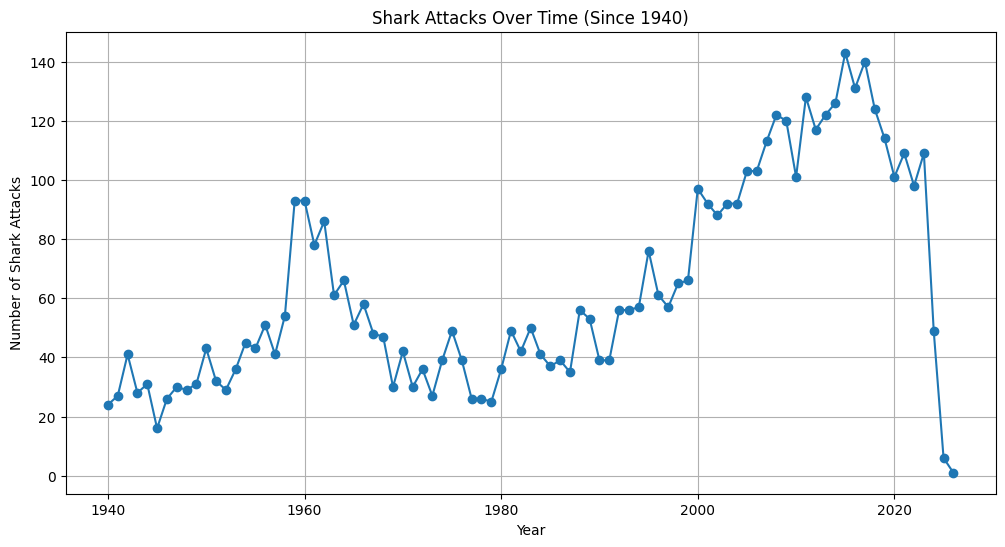

In [ ]:

attacks_per_year = df_filtered['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(attacks_per_year.index, attacks_per_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Shark Attacks')
plt.title('Shark Attacks Over Time (Since 1940)')
plt.grid(True)
plt.show()


Based on the graph, it seems that attacks are increasing over time.

Part 4

In [ ]:
print(df_cleaned['Age'].describe())

print(df_cleaned['Age'].unique())

count     3997
unique     246
top         16
freq        92
Name: Age, dtype: int64
[12 37 23 40 28 69 48 '60+' '?' 57 24 45 61 27 38 16 33 30 15 41 14 26
 'Middle age' 18 21 49 25 46 19 20 65 64 '13' nan '11' '46' '32' '29' '10'
 '64' '62' '39' '22' '15' '16' '21' '66' '52' '20' '44' '26' '47' '55'
 '30' '59' '8' '50' '45' '34' '38' '30s' '37' '9' '19' '20/30' '35' '65'
 '20s' '77' '60' '49' '42' '!2' '24' '73' '25' '18' '50s' '58' '67' '17'
 '14' '6' '41' '53' '68' '43' '40' '51' '31' 39 58 51 17 10 13 60 '40s' 68
 35 62 'teen' 8 22 32 56 'Teen' 42 36 50 'M' 9 11 34 '!6' 31 '!!' 47 55 7
 71 59 53 54 75 '45 and 15' 73 52 29 70 4 63 44 '28 & 22' '22, 57, 31'
 '60s' "20's" 43 67 74 '9 & 60' 'a minor' 6 3 82 66 72 '23' '12' '36' '63'
 '71' '48' '70' '18 months' '57' '7' '28' '33' '61' '74' '27' '3' '56'
 '28 & 26' '5' '54' '86' '18 or 20' '12 or 13' '46 & 34' '28, 23 & 30'
 'Teens' 77 '36 & 26' '8 or 10' 84 '\xa0 ' ' ' '30 or 36' '6½' '21 & ?'
 '33 or 37' 'mid-30s' '23 & 20' 5 ' 30' '7  

count    3957.000000
mean       28.070003
std        14.577324
min         1.000000
25%        17.000000
50%        24.000000
75%        37.000000
max        87.000000
Name: Age, dtype: float64


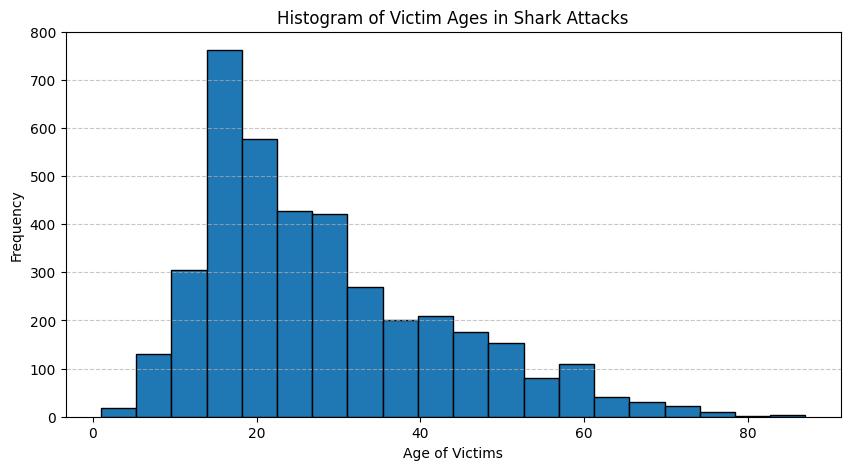

In [ ]:
df_cleaned['Age'] = df_cleaned['Age'].astype(str).str.extract(r'(\d+)')

df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')

df_cleaned = df_cleaned.dropna(subset=['Age'])

df_cleaned['Age'] = df_cleaned['Age'].astype(int)


print(df_cleaned['Age'].describe())
plt.figure(figsize=(10, 5))
plt.hist(df_cleaned['Age'], bins=20, edgecolor='black')
plt.xlabel('Age of Victims')
plt.ylabel('Frequency')
plt.title('Histogram of Victim Ages in Shark Attacks')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Part 5

In [ ]:
print(df_cleaned['Sex'].unique())

['M' 'F' nan ' M' 'M ' 'lli']


In [ ]:
df_cleaned['Sex'] = df_cleaned['Sex'].astype(str).str.strip().str.upper()

df_cleaned['Sex'] = df_cleaned['Sex'].replace({
    'MALE': 'M',
    'FEMALE': 'F',
    'LLI': None
})

df_cleaned = df_cleaned[df_cleaned['Sex'].isin(['M', 'F'])]

print(df_cleaned['Sex'].value_counts())


Sex
M    3334
F     583
Name: count, dtype: int64


In [ ]:
total_victims = len(df_cleaned)

male_victims = (df_cleaned['Sex'] == 'M').sum()

male_proportion = male_victims / total_victims

print(f"Proportion of male victims: {male_proportion:.2%}")


Proportion of male victims: 85.12%


Part 6

In [ ]:
print(df_cleaned['Type'].unique())


['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Sea Disaster' '?'
 nan 'Invalid' 'Under investigation']


In [ ]:
df_cleaned['Type'] = df_cleaned['Type'].astype(str).str.strip().str.upper()

type_mapping = {
    'PROVOKED': 'Provoked',
    'UNPROVOKED': 'Unprovoked',
    '?': 'Unknown',
    'SEA DISASTER': 'Unprovoked',
    'WATERCRAFT': 'Unknown',
    'INVALID': 'Unknown',
    'UNDER INVESTIGATION': 'Unknown'
}

df_cleaned['Type'] = df_cleaned['Type'].replace(type_mapping)

df_cleaned.loc[~df_cleaned['Type'].isin(['Provoked', 'Unprovoked', 'Unknown']), 'Type'] = 'Unknown'

print(df_cleaned['Type'].value_counts())


Type
Unprovoked    3295
Unknown        313
Provoked       309
Name: count, dtype: int64


In [ ]:
total_attacks = len(df_cleaned)

unprovoked_attacks = (df_cleaned['Type'] == 'Unprovoked').sum()

unprovoked_proportion = unprovoked_attacks / total_attacks

print(f"Proportion of unprovoked attacks: {unprovoked_proportion:.2%}")


Proportion of unprovoked attacks: 84.12%


Part 7

In [ ]:
print(df_cleaned['Fatal Y/N'].unique())


['N' 'Y' 'F' nan 'n' 'M' 2017 'UNKNOWN' ' N']


In [ ]:
df_cleaned['Fatal Y/N'] = df_cleaned['Fatal Y/N'].astype(str).str.strip().str.upper()

fatal_mapping = {
    'Y': 'Y',
    'N': 'N',
    'N ': 'N',
    'F': 'Unknown',
    'M': 'Unknown',
    'UNKNOWN': 'Unknown',
    'NAN': 'Unknown'
}

df_cleaned['Fatal Y/N'] = df_cleaned['Fatal Y/N'].replace(fatal_mapping)

df_cleaned.loc[~df_cleaned['Fatal Y/N'].isin(['Y', 'N', 'Unknown']), 'Fatal Y/N'] = 'Unknown'

print(df_cleaned['Fatal Y/N'].value_counts())


Fatal Y/N
N          2994
Y           676
Unknown     247
Name: count, dtype: int64


Part 8

In [ ]:
unprovoked_attacks = df_cleaned[df_cleaned['Type'] == 'Unprovoked']

gender_unprovoked_counts = unprovoked_attacks['Sex'].value_counts()

gender_unprovoked_proportion = gender_unprovoked_counts / gender_unprovoked_counts.sum()

print("Proportion of Unprovoked Attacks by Gender:")
print(gender_unprovoked_proportion)


Proportion of Unprovoked Attacks by Gender:
Sex
M    0.845827
F    0.154173
Name: count, dtype: float64


In [ ]:
fatal_by_type = df_cleaned.groupby('Type')['Fatal Y/N'].value_counts(normalize=True).unstack()

print("Fatality Rate by Type of Attack:")
print(fatal_by_type)


Fatality Rate by Type of Attack:
Fatal Y/N          N   Unknown         Y
Type                                    
Provoked    0.961165  0.009709  0.029126
Unknown     0.236422  0.725240  0.038339
Unprovoked  0.796055  0.005159  0.198786


In [ ]:
fatal_by_gender = df_cleaned.groupby('Sex')['Fatal Y/N'].value_counts(normalize=True).unstack()

print("Fatality Rate by Gender:")
print(fatal_by_gender)


Fatality Rate by Gender:
Fatal Y/N         N   Unknown         Y
Sex                                    
F          0.789022  0.070326  0.140652
M          0.760048  0.061788  0.178164


Sharks are more likely to attack a male unprovoked, a fatal attack is more likely to be unprovoked, and it is more likely to be fatal when it is a male. I think sharks are a fascinating yet necessary member of the ecosystem.

Part 9

In [ ]:
print(df_cleaned['Species '].unique())


['Not stated' 'Bronze whaler' 'Reportedly Tiger or Bull shark' ...
 "Nurse shark, 2.1 m [7'] " '"A pack of sharks"' "12' tiger shark"]


In [ ]:
df_cleaned['Species '] = df_cleaned['Species '].astype(str).str.strip().str.upper()

white_shark_attacks = df_cleaned[df_cleaned['Species '].str.contains('WHITE', na=False)]

total_attacks = len(df_cleaned)

white_shark_count = len(white_shark_attacks)

white_shark_proportion = white_shark_count / total_attacks

print(f"Proportion of attacks by White Sharks: {white_shark_proportion:.2%}")


Proportion of attacks by White Sharks: 12.61%


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. This paper is about how to find the easiest and most efficient way to clean data and datasets.

2. It is intended to provide a standard wya to organize data. It is intendted to simplify the initial exploration so you spend less time cleaning the data and more time at the domain of the problem.

3. The first sentence means that there are tons of nuances and different ways that data can be orignally uploaded. Making there to be numerous problems and numerous ways to fix them. The second sentence means that despite the struccture of a dataset being self explanatory, there can be many problems that arise when actually knowing what a value, whether a variable or an observation, actually pertains to. This could be due to faulty labeling or a myriad of other issues.

4. Values are what a dataset is comprised of, and is usually either numbers or strings. A variable is what contains all values that measure the same underlying attribute across units. An observation contains all values measured on the same unit across attributes.

5. Tidy data is defined as a dataset in which each variable forms a column, each observation forms a row, and each type of observational unti forms a table.

6. The five most common problems are: column headers are values, not variable names, multiple variables are stored in one column, variables are stored in both rows and columns, multiple types of observational units are stored in the same table, a single observational unit is stored in multiple tables. The problem with table 4 is that it has 3 variables, but lacks the accurate column variables. Each of the 3 variables should be listed as column instead of a row. Melting a data set is when you change the dataset from wide to long and columns are created out of the previous values and observations.

7. Table 11 is filled with many nonsensical columns that can be condensed into one date column. Table 12 provides much more information that is easier to analyze.

8. Basically the chicken and egg problem is describing how the tidy tools will only be able to be used to true potential with the tidy form of data. But there maybe more alternative formulations of tidyness that benefit with the data being from a certain shape and structure. Wickham hopes that in the future, tools will be developed to help aid along the other tasks regarding data cleaning. Such as identifying missing values, parsing dates and number, correcting character encodings.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?